In [3]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


In [4]:
tf.keras.backend.clear_session()

In [5]:
def load_and_preprocess_data(data_dir):
    images = []
    labels = []

    for filename in os.listdir(data_dir):
        if filename.endswith(".png"):  # Adjust the file extension as needed
            image = cv2.imread(os.path.join(data_dir, filename))
            images.append(image)
            labels.append(0)  # Assign label 0 for non-defective images

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [6]:
data_dir = 'data/good'
images, labels = load_and_preprocess_data(data_dir)

In [7]:
images[0].shape

(800, 800, 3)

In [8]:
labels.shape

(267,)

In [9]:
images[0]

array([[[17,  8,  9],
        [17,  8,  9],
        [16,  8,  9],
        ...,
        [11,  7,  7],
        [11,  7,  7],
        [11,  6,  6]],

       [[14,  8,  9],
        [14,  8,  9],
        [14,  8,  9],
        ...,
        [11,  7,  7],
        [11,  7,  7],
        [11,  6,  6]],

       [[13,  8, 10],
        [13,  8,  9],
        [13,  9,  9],
        ...,
        [13,  7,  7],
        [11,  7,  7],
        [11,  7,  7]],

       ...,

       [[16,  9,  9],
        [16, 10,  9],
        [16,  9, 10],
        ...,
        [11,  8,  7],
        [11,  8,  7],
        [10,  7,  7]],

       [[18, 14, 15],
        [18, 14, 16],
        [18, 14, 15],
        ...,
        [11,  7,  7],
        [10,  8,  7],
        [11,  7,  7]],

       [[25, 18, 18],
        [24, 19, 19],
        [24, 18, 18],
        ...,
        [11,  7,  6],
        [10,  8,  6],
        [10,  7,  6]]], dtype=uint8)

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-10-27 13:54:24.714400: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-27 13:54:24.714515: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
class PrintValidationAccuracy(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Validation accuracy after epoch {epoch + 1}: {logs["val_accuracy"]:.4f}')

print_validation_accuracy = PrintValidationAccuracy()


In [14]:
history = model.fit(images, labels, epochs=2, batch_size=32, validation_split=0.2, callbacks=[print_validation_accuracy])

Epoch 1/2


2023-10-27 13:54:25.994683: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-27 13:54:26.409092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be

6/7 [========================>.....] - ETA: 15s - loss: 0.0000e+00 - accuracy: 1.0000WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 4.5963s vs `on_train_batch_end` time: 10.0088s). Check your callbacks.


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x21x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x21x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

7/7 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000 

2023-10-27 13:56:14.327905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc

Validation accuracy after epoch 1: 1.0000
7/7 [==============================] - 115s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
7/7 [==============================] - 110s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


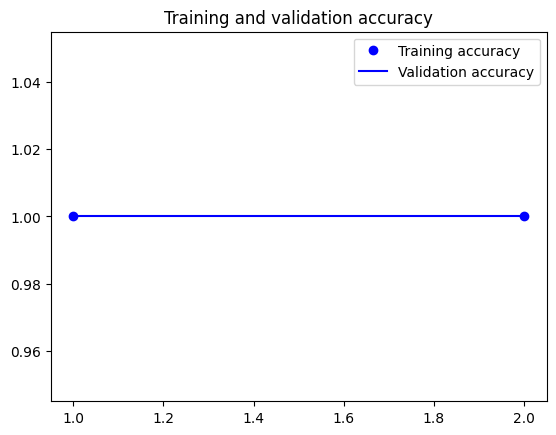

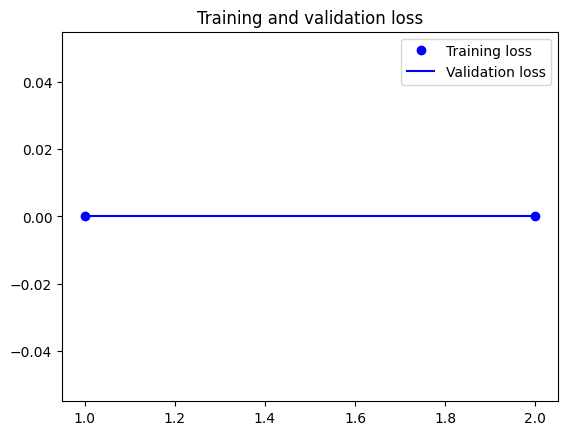

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [30]:
def load_and_preprocess_data_test(data_dir):
    test_images = []
    test_labels = []

    for filename in os.listdir(data_dir):
        if filename.endswith(".png"):  # Adjust the file extension as needed
            image = cv2.imread(os.path.join(data_dir, filename))
            test_images.append(image)
            test_labels.append(1)  # Assign label 0 for non-defective images

    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    return test_images, test_labels

In [31]:
data_dir = 'data/pill_type'
test_images, test_labels = load_and_preprocess_data_test(data_dir)

In [32]:
test_images.shape


(10, 800, 800, 3)

In [33]:
predictions = model.predict(test_images)
predictions

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.49320825e-33]], dtype=float32)

In [38]:
predictions[0]

array([0.], dtype=float32)

In [41]:
threshold = 0  # Adjust as needed
if predictions[9][0] > threshold:
    print("Defective")
else:
    print("Not Defective")


Defective


In [28]:
predictions[0][0]

0.0